<a href="https://colab.research.google.com/github/meriemdouider1/final-dl-code/blob/main/resnet%20v2%20data%202%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import math
import os
import cv2
import numpy as np
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical# convert to one-hot-encoding
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline
from glob import glob
from keras import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meryemdouider","key":"71abdf1b37f401d9b4f539d2b43177eb"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download "meryemdouider/ocular-disease-data"

kaggle.json
 98% 545M/554M [00:07<00:00, 83.0MB/s]
100% 554M/554M [00:07<00:00, 78.4MB/s]


In [7]:
!unzip ocular-disease-data.zip

Archive:  ocular-disease-data.zip
  inflating: data/test/infecteтХа├╝.t/0_left 16.23.24.jpg  
  inflating: data/test/infecteтХа├╝.t/100_left.jpg  
  inflating: data/test/infecteтХа├╝.t/101_left.jpg  
  inflating: data/test/infecteтХа├╝.t/101_right.jpg  
  inflating: data/test/infecteтХа├╝.t/102_left.jpg  
  inflating: data/test/infecteтХа├╝.t/102_right.jpg  
  inflating: data/test/infecteтХа├╝.t/103_left.jpg  
  inflating: data/test/infecteтХа├╝.t/104_left.jpg  
  inflating: data/test/infecteтХа├╝.t/104_right.jpg  
  inflating: data/test/infecteтХа├╝.t/105_left.jpg  
  inflating: data/test/infecteтХа├╝.t/106_left.jpg  
  inflating: data/test/infecteтХа├╝.t/106_right.jpg  
  inflating: data/test/infecteтХа├╝.t/108_left.jpg  
  inflating: data/test/infecteтХа├╝.t/109_left.jpg  
  inflating: data/test/infecteтХа├╝.t/10_left.jpg  
  inflating: data/test/infecteтХа├╝.t/110_left.jpg  
  inflating: data/test/infecteтХа├╝.t/111_left.jpg  
  inflating: data/test/infecteтХа├╝.t/112_right.jpg  
 

In [29]:
DATAGlua_Train = '/content/data/train'
DATAGlua_Test = '/content/data/test'

In [30]:
CATEGORIES  = ['infecté','normale']


In [31]:
x_train_data = []
y_train_data = []
IMG_SIZE=224
def creation_train_data():
    for category in CATEGORIES:
      path = os.path.join(DATAGlua_Train, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            x_train_data.append(new_array)
            y_train_data.append(class_num)
        except Exception as e:
            pass
creation_train_data()

In [32]:
x_test_data = []
y_test_data = []
IMG_SIZE=224
def creation_test_data():
    for category in CATEGORIES:
      path = os.path.join(DATAGlua_Test, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            x_test_data.append(new_array)
            y_test_data.append(class_num)
        except Exception as e:
            pass
creation_test_data ()

In [33]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(x_train_data, y_train_data, test_size=0.05, random_state=1)

In [34]:
X_Train = np. squeeze(np.array(X_Train))
X_Val = np. squeeze(np.array(X_Val))
Y_Train = np. squeeze(np.array(Y_Train))
Y_Val = np. squeeze(np.array(Y_Val))
x_test_data = np. squeeze(np.array(x_test_data))

In [35]:
Y_Train = to_categorical(Y_Train)
Y_Val = to_categorical(Y_Val)

In [36]:
len(X_Train)

2931

In [37]:
len(x_test_data)

385

# **modèle 3 :**

In [38]:
####resnet_v2

In [39]:
IMG_SHAPE = (224, 224,3)

In [40]:
from tensorflow.keras.applications import inception_resnet_v2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten

In [41]:
base_model3 = inception_resnet_v2.InceptionResNetV2

base_model3 = base_model3(weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 2s 0us/step


In [42]:
for layer in base_model3.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(base_model3.layers))

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed_5b
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
conv2d_12
conv2d_14
conv2d_17
batch_normalization_12
batch_normalization_14
batch_normalization_17
activation_12
activation_14
activation_17
block35_1_mixed
block35_1_conv
block35_1
block35_1_ac
conv2d_21
batch_normalization_21
activation_21
conv2d_19
conv2d_22
batc

In [43]:
base_model3.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
________________________________________________________________________________

In [44]:
base_model3.trainable = False

In [45]:
x = base_model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(2, activation='sigmoid')(x)


model3 = Model(base_model3.input, x)
optimizer = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [46]:

model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [47]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

In [48]:
train_datagen.fit(X_Train)

In [49]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(X_Val)

In [50]:
train_model  = model3.fit(X_Train, Y_Train, batch_size=64, epochs=10,
                    validation_data=(X_Val, Y_Val))

Epoch 1/10
46/46 [==============================] - 34s 398ms/step - loss: 2384.7161 - accuracy: 0.5918 - val_loss: 0.6740 - val_accuracy: 0.6000
Epoch 2/10
46/46 [==============================] - 14s 312ms/step - loss: 0.6966 - accuracy: 0.6341 - val_loss: 0.6914 - val_accuracy: 0.6000
Epoch 3/10
46/46 [==============================] - 15s 319ms/step - loss: 0.6875 - accuracy: 0.6563 - val_loss: 0.6828 - val_accuracy: 0.6000
Epoch 4/10
46/46 [==============================] - 15s 329ms/step - loss: 0.6628 - accuracy: 0.6553 - val_loss: 0.6818 - val_accuracy: 0.6000
Epoch 5/10
46/46 [==============================] - 16s 341ms/step - loss: 0.6770 - accuracy: 0.6433 - val_loss: 0.6768 - val_accuracy: 0.6000
Epoch 6/10
46/46 [==============================] - 16s 354ms/step - loss: 0.6605 - accuracy: 0.6621 - val_loss: 0.6814 - val_accuracy: 0.6000
Epoch 7/10
46/46 [==============================] - 16s 347ms/step - loss: 0.6616 - accuracy: 0.6689 - val_loss: 0.6881 - val_accuracy: 0.6

In [51]:
for layer in model3.layers :
   layer.trainable = True
 

In [52]:
optimizer = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [53]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [54]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=3)

In [55]:
train_model  = model3.fit(X_Train, Y_Train, batch_size=64, epochs=10,
                    validation_data=(X_Val, Y_Val))

Epoch 1/10
46/46 [==============================] - 72s 1s/step - loss: 0.7016 - acc: 0.4725 - val_loss: 0.6834 - val_acc: 0.5226
Epoch 2/10
46/46 [==============================] - 51s 1s/step - loss: 0.6719 - acc: 0.6362 - val_loss: 0.6606 - val_acc: 0.6129
Epoch 3/10
46/46 [==============================] - 51s 1s/step - loss: 0.6531 - acc: 0.6655 - val_loss: 0.6604 - val_acc: 0.6000
Epoch 4/10
46/46 [==============================] - 51s 1s/step - loss: 0.6413 - acc: 0.6678 - val_loss: 0.6552 - val_acc: 0.6000
Epoch 5/10
46/46 [==============================] - 51s 1s/step - loss: 0.6362 - acc: 0.6645 - val_loss: 0.6559 - val_acc: 0.6000
Epoch 6/10
46/46 [==============================] - 51s 1s/step - loss: 0.6410 - acc: 0.6437 - val_loss: 0.6588 - val_acc: 0.6000
Epoch 7/10
46/46 [==============================] - 51s 1s/step - loss: 0.6332 - acc: 0.6531 - val_loss: 0.6597 - val_acc: 0.6000
Epoch 8/10
46/46 [==============================] - 51s 1s/step - loss: 0.6248 - acc: 0.66

In [56]:
loss_val, acc_val = model3.evaluate(X_Val, Y_Val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

5/5 [==============================] - 1s 159ms/step - loss: 0.6659 - acc: 0.6000
Validation: accuracy = 0.600000  ;  loss_v = 0.665947


In [57]:
y_test_data = to_categorical(y_test_data)
loss_test, acc_test = model3.evaluate(x_test_data, y_test_data, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

13/13 [==============================] - 2s 176ms/step - loss: 0.6348 - acc: 0.6545
Test: accuracy = 0.654545  ;  loss = 0.634759


In [58]:
model3.save("Incep_ResNet_v2.h5")

Text(0.5, 1.0, 'train_model')

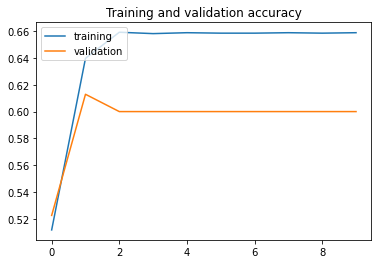

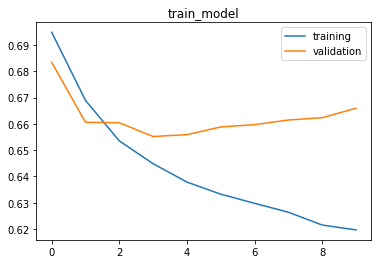

In [59]:

acc = train_model.history['acc']
val_acc = train_model.history['val_acc']


loss = train_model.history['loss']
val_loss = train_model.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('train_model')